In [1]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK data once
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
data =pd.read_csv('IMDB Dataset.csv')
data.head()
stop_words= set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer =WordNetLemmatizer()

def preprocess_text(text):
    # 1 Lowercasing
    text = text.lower()
    # 2️ Removing HTML tags
    text = re.sub(r'<.*?>', '', text)
    # 3️ Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 4️ Removing digits and punctuation — keep only alphabets and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # 5️ Tokenize
    words = word_tokenize(text)
    # 6️ Remove stopwords
    words = [word for word in words if word not in stop_words]
    # 7️ Lemmatize first
    words = [lemmatizer.lemmatize(word) for word in words]
    # 8️ Stem 
    words = [ps.stem(word) for word in words]
    # 9️ Joining back into clean text
    return ' '.join(words)

# Apply preprocessing
data['clean_text'] =data['review'].apply(preprocess_text)
# Tokenize for reference
data['tokens']= data['clean_text'].apply(lambda x: word_tokenize(x))
data.head()

[nltk_data] Downloading package stopwords to /home/akshat-
[nltk_data]     gupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/akshat-
[nltk_data]     gupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/akshat-
[nltk_data]     gupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment,clean_text,tokens
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...,"[one, review, mention, watch, oz, episod, youl..."
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,"[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,"[petter, mattei, love, time, money, visual, st..."


In [2]:
#creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =CountVectorizer()
X =vectorizer.fit_transform(data['clean_text'])
print("Shape:", X.shape)         # number of documents × vocabulary size
print("Non-zero elements:", X.nnz)
print("Vocabulary:", vectorizer.get_feature_names_out())

Shape: (50000, 174311)
Non-zero elements: 4724311
Vocabulary: ['aa' 'aaa' 'aaaa' ... 'zzzzzzzzzzzzz' 'zzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=30000,   # keeping top 30k words to save memory
    ngram_range=(1,2)     # unigrams + bigrams
)
X_tfidf = tfidf_vectorizer.fit_transform(data['clean_text'])
print("Shape:", X_tfidf.shape)
print("Non-zero elements:", X_tfidf.nnz)

Shape: (50000, 30000)
Non-zero elements: 5612746


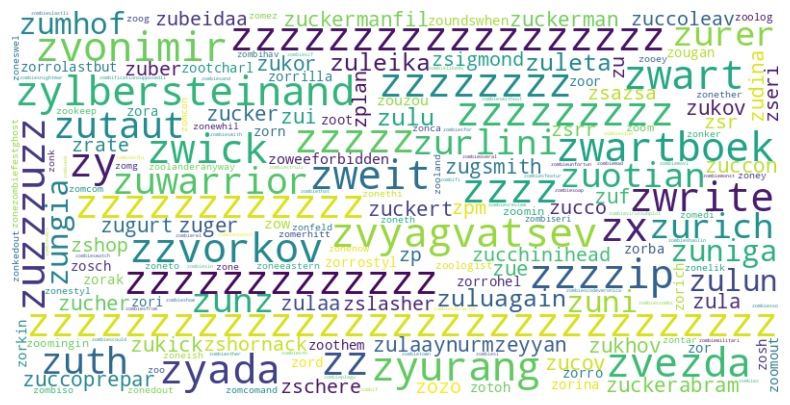

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400,background_color='white').generate_from_frequencies(vectorizer.vocabulary_)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()